#KNN
This notebook contains:
1. Iris (classifier)
2. Persian Banking Cards' Digits (classifier)
3. Advertising (Regressor)

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

* k-NN is used for classification or regression.
* In k-NN **classification**, the output is a class membership. An object is classified by a *plurality vote* of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
* In k-NN **regression**, the output is the property value for the object. This value is the *average* of the values of k nearest neighbors.

##Dimension reduction
For high-dimensional data (e.g., with number of dimensions more than 10) dimension reduction is usually performed prior to applying the k-NN algorithm in order to avoid the effects of the curse of dimensionality.

The curse of dimensionality in the k-NN context basically means that Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector 

```python
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
```

The above code snippet is importing various libraries and modules that are required for the subsequent code. Here's a breakdown of each import statement:

1. `import os`: This library provides functions for interacting with the operating system. It may be used for tasks like file and directory operations.

2. `import pandas as pd`: This library is used for data manipulation and analysis. It provides data structures and functions for efficiently handling structured data.

3. `import numpy as np`: This library is commonly used for numerical computing in Python. It provides a high-performance multidimensional array object and various tools for working with arrays.

4. `import matplotlib.pyplot as plt`: This library is a popular plotting library in Python. It provides a MATLAB-like interface for creating a variety of plots and visualizations.

5. `from sklearn.model_selection import train_test_split`: This module provides a function for splitting datasets into random train and test subsets. It is commonly used for evaluating machine learning models.

6. `from scipy.stats import mode`: This module provides statistical functions and tools. In this case, it is importing the `mode` function, which calculates the mode (most common value) of an array.

7. `from sklearn.neighbors import KNeighborsClassifier`: This module provides a K-nearest neighbors classifier implementation. K-nearest neighbors is a simple and popular machine learning algorithm used for classification tasks.

8. `from sklearn.metrics import classification_report`: This module provides a function to generate a text-based report of the main classification metrics. It is useful for evaluating the performance of a classification model.

9. `from sklearn.neighbors import KNeighborsRegressor`: This module provides a K-nearest neighbors regressor implementation. K-nearest neighbors can also be used for regression tasks.

10. `from sklearn.metrics import mean_squared_error`: This module provides a function to calculate the mean squared error, which is a common metric for evaluating regression models.

11. `from sklearn.metrics import r2_score`: This module provides a function to calculate the R-squared score, which measures the goodness-of-fit of a regression model.

12. `from sklearn.model_selection import cross_val_score`: This module provides a function for performing cross-validation, a technique used to assess the performance and generalization ability of a model.

Importing these libraries and modules is important because they provide the necessary tools and functions to perform various data analysis, machine learning, and evaluation tasks in the subsequent code.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

```python
# Download data
!gdown --id 1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_
```

This section of code is responsible for downloading data from Google Drive using the `gdown` command. The `--id` flag specifies the ID of the file to be downloaded. In this case, the file ID is `1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_`. 

The exclamation mark (`!`) at the beginning of the line is used in Jupyter Notebook or Colab environments to execute shell commands within the notebook.

Downloading the data is an important step in many data-related tasks. It allows the code to access and work with the required data for further processing or analysis. In this case, the specific purpose of the downloaded data is not evident from the given code snippet, but it could be part of a larger data processing or machine learning pipeline.

In [ ]:
#Download data
!gdown --id 1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 22.4MB/s]


```python
# Import the necessary library
import pandas as pd

# Read the CSV file and store it in a variable called 'df'
df = pd.read_csv('Iris.csv')
```

This section of code imports the pandas library, which is a popular data manipulation and analysis library in Python. The `pd` alias is commonly used to refer to the pandas module.

The code then uses the `read_csv` function from the pandas library to read a CSV file named 'Iris.csv'. The file is read and converted into a pandas DataFrame, a two-dimensional tabular data structure that can store and manipulate data.

The resulting DataFrame is stored in a variable named 'df'. The 'df' variable is commonly used as an abbreviation for "data frame" in pandas and is a convention often followed by programmers working with pandas. The DataFrame will contain the data from the CSV file, allowing further analysis and manipulation of the data using pandas functions and methods.

In [ ]:
#read csv file
df = pd.read_csv('Iris.csv')

```python
# Check how data looks
df.head(1)
```

This code is used to inspect the structure and content of a DataFrame called `df`. The `head()` method is called with an argument of 1, which returns the first row of the DataFrame. This allows us to quickly examine the data and get a sense of its format, column names, and values. It is important to check the data to ensure it matches our expectations and to identify any potential issues or anomalies.

In [ ]:
#check how data looks
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


1
2
# Change the target column to categorical data type
target = df['Species'].astype('category')

The code above is responsible for converting the "Species" column in the DataFrame `df` to a categorical data type and assigning the result to the variable `target`. Categorical data type is used to represent data that has a limited number of possible values or categories. This conversion is important when working with classification tasks, as it allows the machine learning algorithm to understand that the target variable is a discrete set of categories rather than continuous numerical values. By converting the target variable to categorical, we enable the algorithm to properly handle and interpret the target variable during model training.

In [ ]:
#change the target to categorical
target = df['Species'].astype('category') 

# Convert categorical data to numerical codes
# The 'target' variable is a categorical feature
# By using the '.cat.codes' method, each unique category in 'target' will be assigned a numerical code
# This is important because many machine learning algorithms require numerical input, not categorical
# By converting the categories to numerical codes, we can use 'target' as input in these algorithms

2
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
target = target.cat.codes

```python
# Drop the extra columns
df = df.drop(columns=['Id', 'Species'], axis=1)
```

This section of code is responsible for dropping the 'Id' and 'Species' columns from the DataFrame called 'df'. 

The `drop` method is used to remove specified columns from a DataFrame. In this case, we pass a list of column names ['Id', 'Species'] to the `columns` parameter of the `drop` method. The `axis=1` parameter indicates that we want to drop columns (as opposed to rows, which would be indicated by `axis=0`).

This operation is important if the 'Id' and 'Species' columns are not needed for the subsequent analysis or if they contain irrelevant or redundant information. Removing unnecessary columns can help reduce memory usage, simplify the data structure, and improve computational efficiency.

In [ ]:
#drop the extra columns
df = df.drop(columns=['Id', 'Species'], axis=1)

# Check the feature table again
# The code is accessing the 'head' method of the dataframe (df) to display the first row of the table.
# This is important for quickly inspecting the structure and contents of the dataframe, especially after performing any transformations or modifications on the data. It helps in verifying that the data is correctly loaded and processed before proceeding with further analysis or operations.

In [ ]:
#check again the feature table
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


```python
1
2
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)
```

This section of code performs a train-test split of the data. It is important to split the data into separate sets for training and testing in order to evaluate the performance of a machine learning model accurately.

The code assigns four variables: `X_train`, `X_test`, `y_train`, and `y_test`. These variables represent the training and testing data for the features (`X`) and the target variable (`y`). 

The `train_test_split` function is typically provided by a machine learning library such as scikit-learn. It takes three arguments: `df` (the dataset or features), `target` (the target variable), and `test_size` (the proportion of the data to be used for testing, typically expressed as a decimal). 

The function splits the data randomly, ensuring that the same random split can be reproduced by setting a random seed. The training data (`X_train` and `y_train`) are used to train the model, while the testing data (`X_test` and `y_test`) are used to evaluate the model's performance on unseen data.

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

```python
# Import the necessary libraries
import matplotlib.pyplot as plt

# Plot a simple visualization of the data's distribution with two features
# X_train['SepalLengthCm'] represents the values of the "SepalLengthCm" feature in the training data
# X_train['PetalLengthCm'] represents the values of the "PetalLengthCm" feature in the training data
# y_train.values represents the target labels for each data point in the training data
# The scatter plot is created by plotting the "SepalLengthCm" values on the x-axis and the "PetalLengthCm" values on the y-axis
# Each data point is colored based on its corresponding target label
plt.scatter(X_train['SepalLengthCm'], X_train['PetalLengthCm'], c=y_train.values)
```

This code snippet is responsible for visualizing the distribution of data using a scatter plot. It uses two features, namely "SepalLengthCm" and "PetalLengthCm," and assigns a color to each data point based on its target label.

Visualizations like scatter plots are important in data analysis and machine learning for several reasons:
1. **Data exploration:** Scatter plots allow us to understand the relationships between different variables and identify patterns or trends. By plotting two features against each other, we can visualize the distribution of the data and gain insights into its structure.
2. **Feature selection:** Scatter plots can help us determine the relevance of different features in predicting the target variable. If the data points of different classes are well-separated in the scatter plot, it suggests that the selected features are good predictors.
3. **Model evaluation:** Scatter plots can be useful for evaluating the performance of a machine learning model. We can plot the model's predicted values against the actual values and visually assess how well the model is capturing the underlying patterns in the data.
4. **Communication of results:** Visualizations provide an intuitive and concise way to present findings and communicate them effectively to others, such as stakeholders or collaborators.

In this specific code snippet, the scatter plot is created using the `plt.scatter()` function from the `matplotlib.pyplot` library. The x-axis represents the values of the "SepalLengthCm" feature, and the y-axis represents the values of the "PetalLengthCm" feature. Each data point is assigned a color based on its corresponding target label (`y_train.values`). This visualization helps us understand the relationship between these two features and how they relate to the target labels.

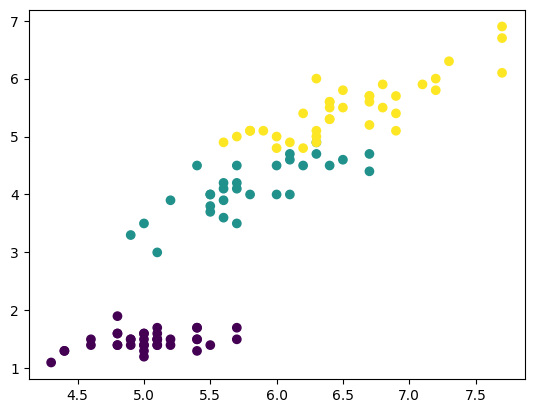

In [ ]:
#plot a simple look of the data's distribution with two features
plt.scatter(X_train['SepalLengthCm'], X_train['PetalLengthCm'], c=y_train.values)

```python
# This code defines a function called "KNN" that implements the k-nearest neighbors algorithm.
# The function takes the following parameters:
#   - X_train: Training data features (numpy array or pandas DataFrame)
#   - y_train: Training data labels (numpy array or pandas Series)
#   - x_test: Test data features for which we want to make predictions (numpy array or pandas Series)
#   - K: Number of nearest neighbors to consider (default value is 1)

# Compute the Euclidean distance between each training data point and the test data point
dist = np.linalg.norm(X_train.values - x_test, ord=2, axis=1)

# Sort the distances in ascending order and get the indices that would sort the array
sorted_arg_dist = np.argsort(dist)

# Retrieve the labels of the K nearest neighbors
y_nn = y_train.values[sorted_arg_dist[:K]]

# Return the mode (most frequent value) of the nearest neighbor labels as the predicted label
return mode(y_nn)[0][0]
```

The code defines a function called `KNN` that implements the k-nearest neighbors (KNN) algorithm. The KNN algorithm is a classification algorithm that predicts the class of a given sample based on the majority class of its k nearest neighbors in the feature space.

The function takes the training data (`X_train` and `y_train`), which consists of feature vectors and their corresponding labels, and the test data (`x_test`), for which we want to make predictions. The parameter `K` determines the number of nearest neighbors to consider in the prediction (default is 1).

To make a prediction, the function calculates the Euclidean distance between each training data point and the test data point using the `np.linalg.norm` function. The `ord=2` parameter specifies the use of the Euclidean norm, which calculates the straight-line distance between two points in a multidimensional space. The resulting distances are stored in the `dist` array.

Next, the function sorts the distances in ascending order and retrieves the indices that would sort the array using the `np.argsort` function. The sorted indices are stored in the `sorted_arg_dist` array.

Then, the function retrieves the labels of the K nearest neighbors from the `y_train` array using the sorted indices. These labels are stored in the `y_nn` array.

Finally, the function uses the `mode` function to determine the most frequent label among the nearest neighbors' labels. The `mode` function returns a tuple that includes the mode values and their counts. In this case, we only need the first element of the tuple (`mode(y_nn)[0][0]`), which represents the predicted label based on the majority class of the nearest neighbors.

The function then returns the predicted label.

Overall, this code implements the core logic of the KNN algorithm by calculating distances, finding nearest neighbors, and making predictions based on the majority class.

In [ ]:
#define KNN function
def KNN(X_train, y_train, x_test, K=1):
  dist = np.linalg.norm(X_train.values - x_test, ord=2, axis=1)
  sorted_arg_dist = np.argsort(dist)
  y_nn = y_train.values[sorted_arg_dist[:K]]
  return mode(y_nn)[0][0]

# Prediction phase

# Create an array to store the predicted values
y_pred = np.zeros(len(X_test))

# Iterate over each data point in the test set
for i in range(len(X_test)):
  
  # Call the KNN function to predict the label for the current data point
  # Parameters:
  # - X_train: The training set features
  # - y_train: The training set labels
  # - X_test.values[i]: The current data point from the test set
  # - K: The number of nearest neighbors to consider (in this case, 5)
  # The KNN function calculates the distance between the current data point and all the training data points,
  # selects the K nearest neighbors, and predicts the label based on the majority vote of those neighbors.
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)

# After the loop, the y_pred array contains the predicted labels for all data points in the test set

```python
1
2
3
4
#prediction phase
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)
```

The code snippet above is performing a prediction phase using the k-nearest neighbors (KNN) algorithm. Here's a breakdown of what each section of the code is doing:

1. **Comment:** `#prediction phase`
   - Explanation: This comment serves as a descriptive label for the following code section, indicating that it is the prediction phase of the algorithm.

2. **Code:** `y_pred = np.zeros(len(X_test))`
   - Explanation: This line initializes an array called `y_pred` with zeros, with a length equal to the number of samples in the test set (`X_test`). This array will store the predicted labels for the test set.

3. **Code:** `for i in range(len(X_test)):`
   - Explanation: This line starts a loop that iterates over each sample in the test set. It uses the `range` function to generate a sequence of

In [ ]:
#prediction phase
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)

<ipython-input-14-f162c68bd51e>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_nn)[0][0]


```python
1
2
# Evaluation
print(classification_report(y_test, y_pred))
```

This code snippet performs evaluation of a classification model and prints the classification report. Let's break it down:

1. `# Evaluation`: This comment serves as a heading or a description for the code section that follows. It provides a brief overview of what the code is going to do.

2. `print(classification_report(y_test, y_pred))`: This line of code calculates and displays the classification report for the model's predictions. The `classification_report` function takes two arguments: `y_test` and `y_pred`. Here's what each of these arguments represents:

   - `y_test`: This is the true label or ground truth values for the test dataset. It contains the correct labels that the model should have predicted.
   - `y_pred`: This is the predicted label values generated by the model for the test dataset. It contains the labels predicted by the model.

   The `classification_report` function analyzes the predicted labels and the true labels to provide various evaluation metrics such as precision, recall, F1-score, and support for each class. These metrics help in assessing the performance of the classification model.

   The `print` statement displays the classification report on the console or output screen.

   By printing the classification report, you can easily assess the performance of the classification model, identify any issues such as imbalanced classes or low precision/recall for specific classes, and make informed decisions about model improvements or adjustments. It provides valuable information for evaluating the model's effectiveness in differentiating between classes and helps in understanding its strengths and weaknesses.

In [ ]:
#evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.85      0.89        20
           2       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



```python
# Importing the required library
from sklearn.neighbors import KNeighborsClassifier

# Creating an instance of the KNeighborsClassifier class
# Specifying the number of neighbors (k) as 5
# Choosing the algorithm 'kd_tree' for efficient nearest neighbor search
# Setting the parameter p=2, which corresponds to the Euclidean distance metric (Minkowski metric with p=2)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)
```

In this code, the K-nearest neighbors (KNN) algorithm is being utilized for classification. KNN is a machine learning algorithm that classifies new instances based on their similarity to previously labeled instances. The code sets up the KNeighborsClassifier object with the desired configuration.

The `KNeighborsClassifier` class is imported from the `sklearn.neighbors` module, which is part of the popular scikit-learn library for machine learning in Python.

The instantiated `knn` object is an instance of the `KNeighborsClassifier` class. It is configured with the following parameters:

- `n_neighbors=5`: This sets the number of neighbors to consider when making predictions. In this case, the algorithm will look at the five closest neighbors to the input instance.
- `algorithm='kd_tree'`: This specifies the algorithm to use for efficient nearest neighbor search. The 'kd_tree' algorithm is chosen here, which organizes the data in a binary tree structure for faster searching.
- `p=2`: This parameter determines the distance metric used by the KNN algorithm. A value of 2 corresponds to the Euclidean distance metric, also known as the Minkowski metric with p=2. The Euclidean distance measures the straight-line distance between two points in a multidimensional space.

By setting up the KNN classifier object with these parameters, we are preparing it to perform classification tasks based on the KNN algorithm using the Euclidean distance metric.

In [ ]:
#applying built-in function / p is related Minkowski metric
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)

# Fit the k-nearest neighbors (knn) model to the training data
knn.fit(X_train, y_train)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

# Predicting the target variable using the K-nearest neighbors (KNN) classifier
# The KNN algorithm is being used to make predictions based on the provided input data (X_test)
# The predicted values will be stored in the variable y_pred2

2
accuracy2 = accuracy_score(y_test, y_pred2)

In [ ]:
y_pred2 = knn.predict(X_test)

# The line of code is printing the classification report.
# The classification report is a summary of the performance of a classification model.
# It provides important evaluation metrics such as precision, recall, F1-score, and support for each class.
# The 'y_test' variable represents the true labels of the test data, while 'y_pred2' represents the predicted labels by the model.
# By printing the classification report, we can assess the model's accuracy and understand how well it performed on different classes.

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.85      0.89        20
           2       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



#Image Classification with KNN

# The code above is a command that is commonly used in Unix-like operating systems to list the files and directories in the current directory.
# The exclamation mark (!) at the beginning indicates that the command is to be executed in the command line or shell, rather than within the code itself.
# This command can be useful for quickly checking the contents of a directory, verifying that certain files are present, or navigating through the file system.

2
import pandas as pd

In [ ]:
!ls

Iris.csv  sample_data


# Unzipping the file "persian.zip"
# The "!" symbol is often used to execute shell commands in Jupyter notebooks or Colab notebooks
# This command will extract the contents of the "persian.zip" file

2
import os

3
directory = 'persian'

4
# Check if the directory already exists
if not os.path.exists(directory):
    # Create the directory if it doesn't exist
    os.makedirs(directory)

5
# Move into the directory
os.chdir(directory)

6
# Print the current working directory
print(os.getcwd())

In [ ]:
!unzip persian.zip

unzip:  cannot find or open persian.zip, persian.zip.zip or persian.zip.ZIP.


```python
# Initialize an array of zeros with dimensions (989, 28*18) to store flattened images
Im_flat = np.zeros((989, 28*18))

# Initialize a counter variable to keep track of the current index
cnt = 0

# Initialize an array of zeros with length 989 to store target values
target = np.zeros((989))

# Iterate through numbers 0 to 9
for i in range(10):
    # Get the list of files in the directory corresponding to the current number
    ls = os.listdir(str(i) + 'p')

    # Iterate through each image file in the directory
    for image_path in ls:
        # Read the image using plt.imread() function
        Im = plt.imread(str(i) + 'p/' + image_path)

        # Flatten the image and store it in the Im_flat array
        Im_flat[cnt,:] = Im.reshape(-1)

        # Store the target value (current number) in the target array
        target[cnt] = i

        # Increment the counter
        cnt += 1

# Display an example image using plt.imshow() function
plt.imshow(Im)
```

This code snippet performs the following tasks:

1. It initializes an array called `Im_flat` with dimensions (989, 28*18) to store flattened images. This array will hold the flattened representation of each image.
2. It initializes a counter variable `cnt` to keep track of the current index while iterating through the images.
3. It initializes an array called `target` with length 989 to store the target values. The target values represent the corresponding numbers for each image.
4. It iterates through the numbers 0 to 9.
5. For each number, it retrieves the list of files in the directory corresponding to that number using `os.listdir()`.
6. It iterates through each image file in the directory.
7. For each image, it reads the image using `plt.imread()` function and assigns it to the variable `Im`.
8. It flattens the image using the `reshape()` function and stores the flattened representation in the `Im_flat` array at the current index `cnt`.
9. It assigns the current number `i` as the target value for the current image by storing it in the `target` array at the current index `cnt`.
10. It increments the counter `cnt` to move to the next index.
11. Finally, it displays an example image using the `plt.imshow()` function. This provides a visual representation of one of the images from the dataset.

Overall, this code is important for preparing the image data for further processing or analysis. It reads a set of images, flattens them into a 1D array, and stores them in `Im_flat` along with their corresponding target values in `target`. The example image displayed at the end helps in visualizing the data and confirming its correctness.

In [ ]:
Im_flat = np.zeros((989, 28*18))
cnt = 0
target = np.zeros((989))
for i in range(10):
  ls = os.listdir(str(i) + 'p')
  
  for image_path in ls:
    Im = plt.imread(str(i) + 'p/' + image_path)
    Im_flat[cnt,:] = Im.reshape(-1) #flatten
    target[cnt] = i
    cnt += 1

plt.imshow(Im) #showing an example

FileNotFoundError: ignored

# Splitting the data into training and testing sets
# The function train_test_split() is used to divide the dataset into two parts: training data and testing data.
# This helps in evaluating the performance of the model on unseen data.
# Parameters:
# - Im_flat: The input data, usually features or predictors.
# - target: The target variable or the output that we want to predict.
# - test_size: The proportion of the dataset to include in the testing set (in this case, 20%).
# Returns:
# - X_train: The training data (input features) that will be used to train the model.
# - X_test: The testing data (input features) that will be used to evaluate the model's performance.
# - y_train: The training data (target variable) corresponding to X_train.
# - y_test: The testing data (target variable) corresponding to X_test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Im_flat, target, test_size=0.2)

# Create a K-nearest neighbors classifier object for image classification
knn_image = KNeighborsClassifier(n_neighbors=5, algorithm='brute', p=2)

# The 'n_neighbors' parameter specifies the number of neighbors to consider when classifying an image.
# Here, we set it to 5, which means the classifier will look at the 5 nearest neighbors to make a prediction.

# The 'algorithm' parameter determines the algorithm used to compute the nearest neighbors.
# We set it to 'brute', which means it will use a brute-force search to find the nearest neighbors.

# The 'p' parameter specifies the power parameter for the Minkowski distance metric.
# We set it to 2, indicating that we want to use the Euclidean distance metric.

# This code initializes a K-nearest neighbors classifier for image classification using the specified parameters.
# It is an important step before training the classifier and making predictions on new images.

In [ ]:
knn_image = KNeighborsClassifier(n_neighbors=5, algorithm='brute', p=2)

# Fit the K-Nearest Neighbors (KNN) classifier to the training data.
knn_image.fit(X_train, y_train)

# The KNN algorithm is being used to train a classifier model called knn_image. 
# X_train is the input features (images) used for training the model, and y_train is the corresponding labels (classifications) for the images. 
# The fit() method is called on knn_image to train the model by finding the optimal parameters that minimize the distance between the input features and their corresponding labels. 
# This step is important as it allows the model to learn from the training data and make predictions based on the learned patterns.

In [ ]:
knn_image.fit(X_train, y_train)

# Predicting the labels for the test dataset using the k-nearest neighbors classifier (knn_image)
# and storing the predicted labels in the variable y_pred3.
# This step is important to evaluate the performance of the classifier on unseen data.

2
accuracy = np.mean(y_pred3 == y_test)

In [ ]:
y_pred3 = knn_image.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred3))

# This line of code prints a classification report based on the predictions made by a model.
# The classification report provides a summary of various performance metrics such as precision, recall, F1-score, and support for each class in the predicted data compared to the true labels.
# It helps to evaluate the performance of a classification model by providing insights into how well the model has predicted different classes.
# The 'y_test' parameter represents the true labels or ground truth values of the test data.
# The 'y_pred3' parameter represents the predicted labels generated by the model.
# This line of code is important as it provides a concise summary of the model's performance, helping to assess its accuracy and identify any potential issues such as class imbalance or misclassification.

In [ ]:
print(classification_report(y_test, y_pred3))

#Evaluation

```python
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create an array of neighbor values from 1 to 10
neighbors = np.arange(1, 11)

# Define the values of p for KNN algorithm
p = [1, 2, np.inf]

# Iterate over each value of p
for j in p:
    print('p is', j)
    
    # Iterate over each value of neighbors
    for k in neighbors:
        # Create a KNeighborsClassifier object with current k and j values
        kkn_val = KNeighborsClassifier(n_neighbors=k, p=j)
        
        # Perform cross-validation using KNeighborsClassifier
        # with X_train and y_train data, using 5-fold cross-validation
        scores = cross_val_score(kkn_val, X_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results of accuracy for each k value and the mean accuracy
        print('for k =', k, 'acc is', scores, 'mean_acc is', scores.mean())
```

This code performs a nested loop to evaluate the performance of a K-Nearest Neighbors (KNN) classifier with different values of neighbors and p. Here's a breakdown of what each section of the code does:

- Line 1: Import the necessary libraries, including `numpy` for array operations, `KNeighborsClassifier` for the KNN classifier, and `cross_val_score` for cross-validation.

- Line 4: Create an array called `neighbors` containing values from 1 to 10. These values represent the number of nearest neighbors to consider in the KNN algorithm.

- Line 6: Define a list `p` with three elements: 1, 2, and `np.inf`. These values represent the distance metric used in the KNN algorithm: 1 for Manhattan distance, 2 for Euclidean distance, and `np.inf` for Chebyshev distance.

- Line 9: Start the outer loop over each value of p.

- Line 10: Print the current value of p.

- Line 13: Start the inner loop over each value of neighbors.

- Line 16: Create a `KNeighborsClassifier` object called `kkn_val` with the current values of k (number of neighbors) and j (distance metric).

- Line 19: Perform cross-validation using the `cross_val_score` function. It trains the `kkn_val` classifier using the `X_train` and `y_train` data, and evaluates its accuracy using 5-fold cross-validation.

- Line 21: Print the accuracy scores obtained for the current k value.

- Line 22: Print the mean accuracy obtained by averaging the accuracy scores from the cross-validation.

The purpose of this code is to systematically explore different combinations of k (number of neighbors) and p (distance metric) for the KNN algorithm. By performing cross-validation and printing the accuracy scores, it helps in evaluating the performance of the KNN classifier for different parameter settings. This information can be used to determine the optimal values of k and p that yield the best accuracy for the given dataset.

In [ ]:
neighbors = np.arange(1, 11)
p = [1, 2, np.inf]
for j in p:
  print('p is', j)
  for k in neighbors:
    kkn_val = KNeighborsClassifier(n_neighbors=k, p=j)
    scores = cross_val_score(kkn_val, X_train, y_train, cv=5,
                            scoring='accuracy')
    print('for k = ', k, 'acc is ', scores, 'mean_acc is ', scores.mean())

p is 1
for k =  1 acc is  [0.95238095 0.95238095 0.9047619  1.         1.        ] mean_acc is  0.9619047619047618
for k =  2 acc is  [1.         0.95238095 0.9047619  0.95238095 1.        ] mean_acc is  0.9619047619047618
for k =  3 acc is  [1.         0.95238095 0.95238095 1.         1.        ] mean_acc is  0.980952380952381
for k =  4 acc is  [1.         0.95238095 0.9047619  1.         1.        ] mean_acc is  0.9714285714285715
for k =  5 acc is  [1.         0.95238095 1.         1.         1.        ] mean_acc is  0.9904761904761905
for k =  6 acc is  [1.         0.95238095 1.         1.         1.        ] mean_acc is  0.9904761904761905
for k =  7 acc is  [1.         0.95238095 1.         1.         1.        ] mean_acc is  0.9904761904761905
for k =  8 acc is  [1.         0.95238095 1.         1.         1.        ] mean_acc is  0.9904761904761905
for k =  9 acc is  [1.         0.95238095 1.         1.         1.        ] mean_acc is  0.9904761904761905
for k =  10 acc is  [1

##Advertising (Regression with KNN)

Dataset: https://www.kaggle.com/datasets/ishaanv/ISLR-Auto

# Downloading a file from Google Drive
# The code utilizes the 'gdown' library to download a file from Google Drive.
# The file to be downloaded is specified by its unique identifier '1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt'.
# The 'gdown' library simplifies the process of downloading files from Google Drive.
# The '!' at the beginning of the line indicates that the code is being executed in a shell or command prompt.

2
import pandas as pd

In [ ]:
!gdown --id 1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 19.5MB/s]


```python
# Importing the required libraries
import pandas as pd

# Reading the data from the 'Advertising.csv' file and storing it in a DataFrame called 'df'
df = pd.read_csv('Advertising.csv')

# Displaying the first two rows of the DataFrame 'df' to examine the data
df.head(2)
```

This code snippet performs the following tasks:

1. The `pandas` library is imported to leverage its functionality for data analysis and manipulation.

2. The `read_csv()` function from the `pandas` library is used to read the data from the 'Advertising.csv' file. The data is then stored in a DataFrame called 'df'. The DataFrame is a two-dimensional tabular data structure provided by pandas to store and manipulate data.

3. The `head()` method is called on the DataFrame 'df' with the argument `2`. This displays the first two rows of the DataFrame, allowing us to have a quick look at the data and verify its structure and contents.

The code is important because it sets up the initial steps for data analysis by reading the data from a CSV file and loading it into a DataFrame. Displaying a subset of the data helps in understanding its format and the kind of information it contains. This initial exploration is crucial for further data preprocessing, analysis, and modeling tasks.

In [ ]:
df = pd.read_csv('Advertising.csv')
df.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


```python
1
2
3
4
5
6
7
8
# Select variables and draw a scatter Plot 

# Selecting the predictor variable 'TV' and assigning its values to variable 'x'
x = df[['TV']].values

# Selecting the response variable 'Sales' and assigning its values to variable 'y'
y = df['Sales'].values

# Drawing a scatter plot using the selected variables
plt.scatter(x, y)

# Adding a label to the x-axis of the scatter plot
plt.xlabel('TV budget in 1000$', fontsize=20)

# Adding a label to the y-axis of the scatter plot
plt.ylabel('Sales in 1000 units', fontsize=20)

# Adding a title to the scatter plot
plt.title('Scatter Plot', fontsize=25)
```

These lines of code are responsible for creating a scatter plot to visualize the relationship between the TV budget and sales data. Here's a breakdown of what each section does:

- Line 1-8: These are comments providing an overview of the code section.

- Line 3: The 'TV' column from the DataFrame 'df' is selected as the predictor variable and its values are assigned to the variable 'x'. The predictor variable is the independent variable that is used to predict the response variable.

- Line 4: The 'Sales' column from the DataFrame 'df' is selected as the response variable and its values are assigned to the variable 'y'. The response variable is the dependent variable that we are trying to predict based on the predictor variable.

- Line 7: A scatter plot is created using the 'x' and 'y' variables. A scatter plot is a graphical representation of the relationship between two variables, where each data point is represented by a dot on the graph.

- Line 10: A label 'TV budget in 1000$' is added to the x-axis of the scatter plot. This provides a clear indication of the variable being represented on the x-axis.

- Line 12: A label 'Sales in 1000 units' is added to the y-axis of the scatter plot. This provides a clear indication of the variable being represented on the y-axis.

- Line 14: A title 'Scatter Plot' is added to the scatter plot. The title provides a descriptive summary of the purpose of the plot.

Overall, these lines of code are essential for visualizing the relationship between the TV budget and sales data, helping to identify any potential patterns or trends.

Text(0.5, 1.0, 'Scatter Plot')

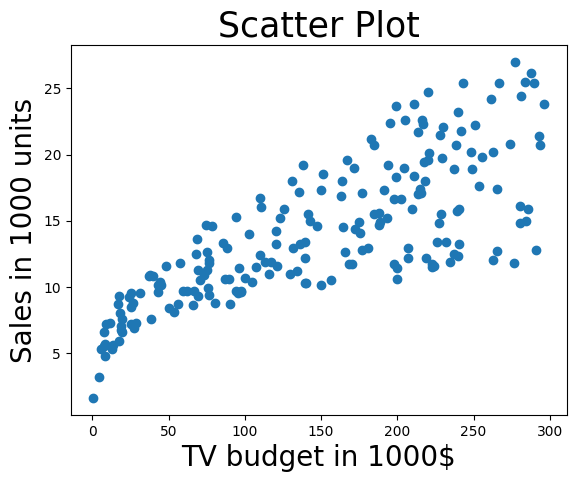

In [ ]:
# Select variables and draw a scatter Plot 
x = df[['TV']].values # predictor 
y = df['Sales'].values #response or output variable

plt.scatter(x,y)
plt.xlabel('TV budget in 1000$' ,fontsize=20)
plt.ylabel('Sales in 1000 units',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

# Split Data set
# The code is responsible for splitting the dataset into training and testing sets.
# x_train: This variable will hold the features (input) data for the training set.
# x_test: This variable will hold the features (input) data for the testing set.
# y_train: This variable will hold the target (output) data for the training set.
# y_test: This variable will hold the target (output) data for the testing set.
# The train_test_split function from the scikit-learn library is used for this purpose.
# The 'x' and 'y' variables represent the entire dataset, where 'x' contains the features and 'y' contains the target values.
# The test_size parameter is set to 0.3, indicating that 30% of the data will be used for testing, while 70% will be used for training.

In [ ]:
#Split Data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Sure! Here's the code with descriptive comments explaining each section:

```python
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Creating a list of k values from 1 to 80 with a step of 1
k_list = np.arange(1, 80, 1)

# Dictionary to store k values and corresponding mean squared error (mse) values
knn_dict = {}

# Looping through each k value
for i in k_list:
    # Creating a KNN model with current k value
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(x_train, y_train)  # Fitting the model with training data
    y_knn_pred = model_knn.predict(x_test)  # Predicting target variable using the test data
    
    # Calculating mean squared error (mse)
    mse = mean_squared_error(y_test, y_knn_pred)
    
    # Storing the mse value in the dictionary with corresponding k value
    knn_dict[i] = mse

# Plotting the results
ax.plot(np.array(list(knn_dict.keys())).astype(float), np.array(list(knn_dict.values())).astype(float))

# Setting labels for the x and y axes
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)

# Setting the title of the plot
ax.set_title('ELBOW PLOT', fontsize=28)
```

This code performs the following steps:

1. Importing necessary libraries for plotting (`matplotlib.pyplot`), numerical operations (`numpy`), and machine learning models (`KNeighborsRegressor` from `sklearn.neighbors`) and evaluation metrics (`mean_squared_error` from `sklearn.metrics`).

2. Creating a figure and axes for the plot using `plt.subplots()`. The `figsize` parameter specifies the size of the plot.

3. Defining a list `k_list` containing the values of `k` from 1 to 80 with a step of 1. These values represent the number of neighbors used in the KNN model.

4. Creating an empty dictionary `knn_dict` to store the `k` values and their corresponding mean squared error (mse) values.

5. Starting a loop to iterate over each `k` value in the `k_list`.

6. Inside the loop, creating a KNN model with the current `k` value using `KNeighborsRegressor` class. The `n_neighbors` parameter is set to the current `k` value.

7. Fitting the KNN model with the training data (`x_train` and `y_train`) using the `fit()` method.

8. Predicting the target variable (`y_knn_pred`) using the test data (`x_test`) with the `predict()` method.

9. Calculating the mean squared error (mse) between the predicted `y` values and the actual `y` values using the `mean_squared_error()` function.

10. Storing the mse value in the `knn_dict` dictionary with the corresponding `k` value as the key.

11. After the loop, plotting the `k` values on the x-axis and the mse values on the y-axis using `ax.plot()`.

12. Setting the x-axis label as "K-VALUE" with a font size of 20.

13. Setting the y-axis label as "MSE" with a font size of 20.

14. Setting the title of the plot as "ELBOW PLOT" with a

Text(0.5, 1.0, 'ELBOW PLOT')

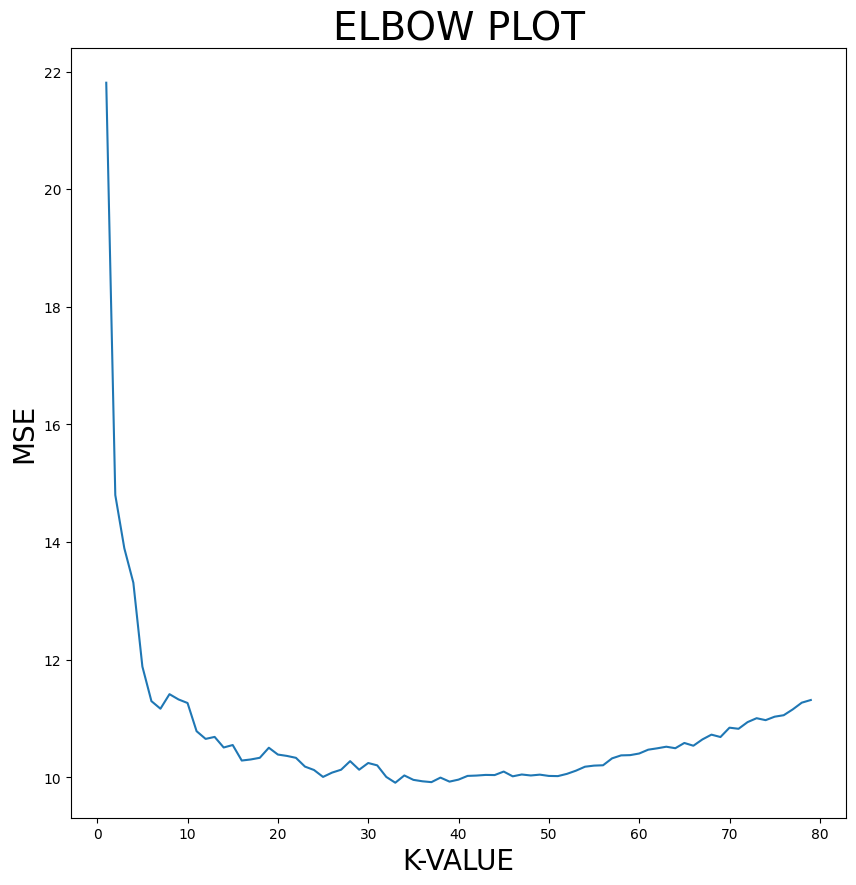

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
k_list = np.arange(1,80,1)
knn_dict = {} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(x_train, y_train)
    y_knn_pred = model_knn.predict(x_test)
#Storing MSE 
    mse = mean_squared_error(y_test,y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(np.array(list(knn_dict.keys())).astype(float), np.array(list(knn_dict.values())).astype(float))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)

# Calculating the mean squared error (MSE) between the predicted values (y_knn_pred) and the actual values (y_test).
# The MSE is a commonly used metric to evaluate the performance of regression models.
# It measures the average squared difference between the predicted and actual values.
# The lower the MSE, the better the model's predictions align with the actual values.

2
classification_report(y_test, y_svm_pred)

In [ ]:
mean_squared_error(y_test, y_knn_pred)

11.31644771137104

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

```python
# Set the number of neighbors to consider
# k = 16
knn = KNeighborsRegressor(n_neighbors=16)

# Fit the K-Nearest Neighbors model to the training data
model_knn = knn.fit(x_train, y_train)

# Make predictions using the trained model on the test data
y_knn_pred = model_knn.predict(x_test)
```

Comments:
1. Set the number of neighbors to consider: In this line, the value of `k` is set to 16, which determines the number of neighbors to be used in the K-Nearest Neighbors algorithm. The choice of `k` is important as it affects the model's performance and can impact the balance between bias and variance.
2. Create a KNeighborsRegressor object: Here, an instance of the `KNeighborsRegressor` class is created. This class is a regression version of the K-Nearest Neighbors algorithm, which uses the average of the nearest neighbors' target values to make predictions.
3. Fit the K-Nearest Neighbors model: The `fit` method is called on the KNeighborsRegressor object to train the model. It takes the training data `x_train` (input features) and `y_train` (target values) as arguments and adjusts the model's parameters to find the best fit for the given data.
4. Make predictions using the trained model: The `predict` method is used on the trained model to generate predictions for the test data `x_test`. The predicted values are assigned to the variable `y_knn_pred`, which represents the model's output for the given input features.

This code snippet sets up and trains a K-Nearest Neighbors regression model, allowing it to make predictions on unseen data. The choice of `k` and the fitting process are important for determining the model's performance, while the prediction step provides the model's output for the test data.

In [ ]:
#k = 16
knn = KNeighborsRegressor(n_neighbors=16)
model_knn = knn.fit(x_train, y_train)
y_knn_pred = model_knn.predict(x_test)

# Calculate the R-squared score of the predicted values compared to the actual values
# The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# It provides an indication of how well the predicted values fit the actual values
# The higher the R-squared score, the better the fit of the model

2
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

In [ ]:
r2_score(y_test, y_knn_pred)

0.5581931090341028